# Pandas - ERx apps

### Initialize some stuff

In [1]:
# Render plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
%%html
<!-- Align html tables to the left -->
<style>
table {float:left}
</style>

### Load apps csv and show the columns

This apps csv comes from what we worked on yesterday. Here are the steps that I followed to produce it:
1. Generate the "buckets": Run a query to generate a new slice definition. This time it's a daily slice.
2. Throw the apps into the buckets: Run a query to count the number of apps that falls into each slice.
3. Export to csv.
4. Upload the csv into jupyter.

In [3]:
df = pd.read_csv('apps.csv', encoding="utf-8-sig")
df.columns

Index(['Year', 'Dayofyear', 'Inq', 'Sub', 'Com', 'Adm', 'Dep', 'Pre', 'Pay',
       'Act'],
      dtype='object')

### CSV Column information

| Column | Note |
|:----- |:---- |
| Year  | Year of the Entrance Term |
| Dayofyear | Day of year if we count backwards from September 21. i.e. "1" does not mean "January 1" but something like "September 22 or earlier" |
| Inq, Sub, Com, etc | Number of apps in that day for that stage |

### Show some rough stats

In [4]:
df.describe()

,Year,Dayofyear,Inq,Sub,Com,Adm,Dep,Pre,Pay,Act
count,1460.000000,1460.000000,1139.000000,1019.000000,918.000000,868.000000,785.000000,403.000000,142.000000,142.000000
mean,2015.500000,183.000000,40.613696,10.834151,7.839869,7.735023,3.892994,6.905707,17.288732,17.225352
std,1.118417,105.402131,260.172253,24.115166,9.364860,9.137868,4.379482,24.008623,31.843719,31.707527
min,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2014.750000,92.000000,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,2015.500000,183.000000,13.000000,7.000000,5.000000,5.000000,2.000000,3.000000,5.000000,5.000000
75%,2016.250000,274.000000,29.000000,12.000000,10.000000,10.000000,5.000000,5.000000,18.000000,18.000000
max,2017.000000,365.000000,4944.000000,425.000000,119.000000,110.000000,47.000000,341.000000,237.000000,235.000000


### Show top 5 rows of the data

In [11]:
df[:5]

,Year,Dayofyear,Inq,Sub,Com,Adm,Dep,Pre,Pay,Act
0,2014,1,3202,262,44,37,NaN,NaN,NaN,NaN
1,2014,2,57,8,1,NaN,NaN,NaN,NaN,NaN
2,2014,3,20,5,2,NaN,NaN,NaN,NaN,NaN
3,2014,4,39,3,NaN,5,NaN,NaN,NaN,NaN
4,2014,5,23,5,1,NaN,NaN,NaN,NaN,NaN


### 1. Select only the Inq part

In [6]:
inq = df[['Year', 'Dayofyear', 'Inq']]
inq.head()

,Year,Dayofyear,Inq
0,2014,1,3202
1,2014,2,57
2,2014,3,20
3,2014,4,39
4,2014,5,23


### 2. Pivot by Dayofyear for each of the Year

In [7]:
pivot = inq.pivot_table(index='Dayofyear', columns='Year').fillna(0)
pivot.head()

Inq                  
Year       2014  2015  2016  2017
Dayofyear                        
1          3202  4749  4405  4944
2            57    32     9   144
3            20    52     4    14
4            39     5     0    51
5            23    29     0    14

### 3. Get cumulative sum for each column

In [8]:
cumulative = pivot.cumsum()
cumulative.head()

Inq                  
Year       2014  2015  2016  2017
Dayofyear                        
1          3202  4749  4405  4944
2          3259  4781  4414  5088
3          3279  4833  4418  5102
4          3318  4838  4418  5153
5          3341  4867  4418  5167

### 4. Plot it

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


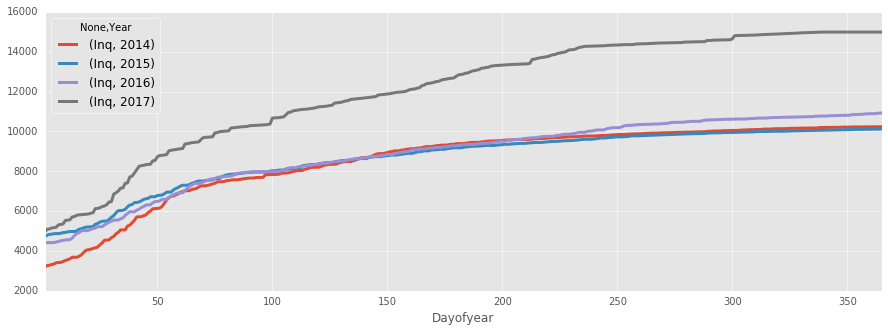

In [9]:
matplotlib.style.use('ggplot')
plt.figure()
cumulative.plot(linewidth=3)

### Do steps 1-4 in a loop

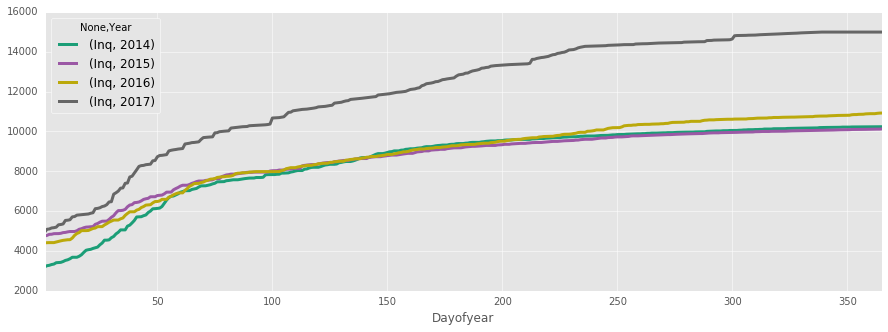

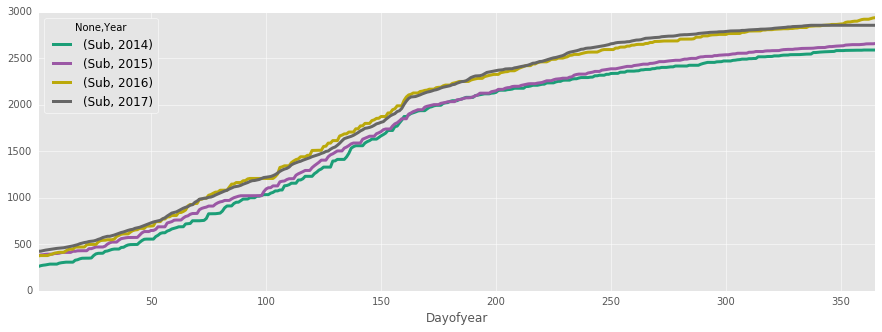

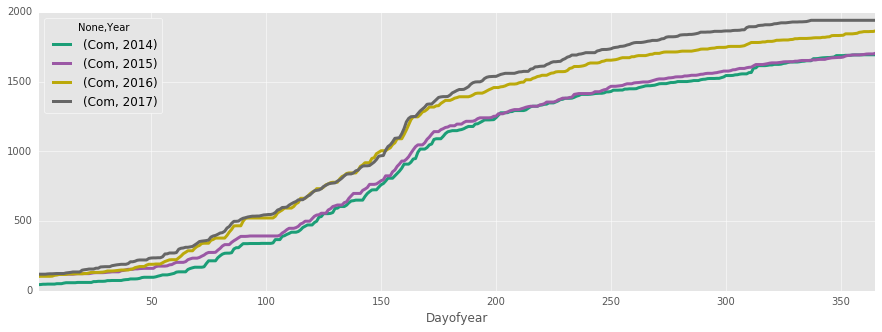

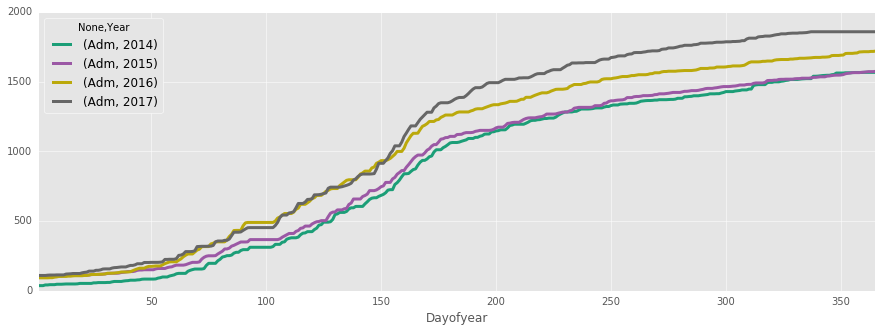

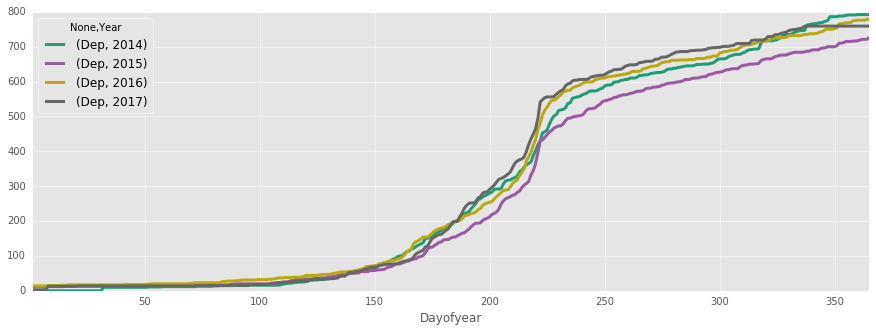

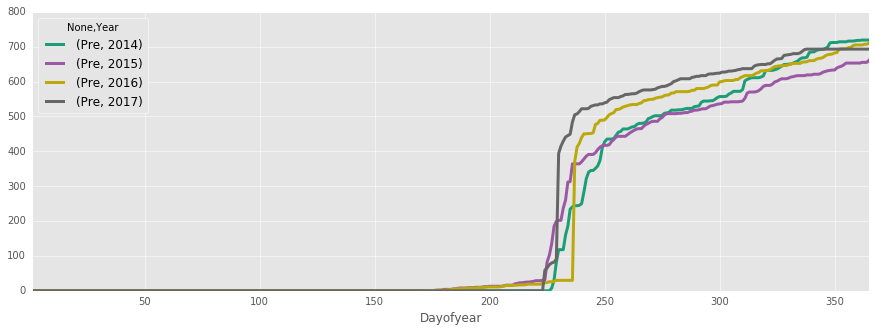

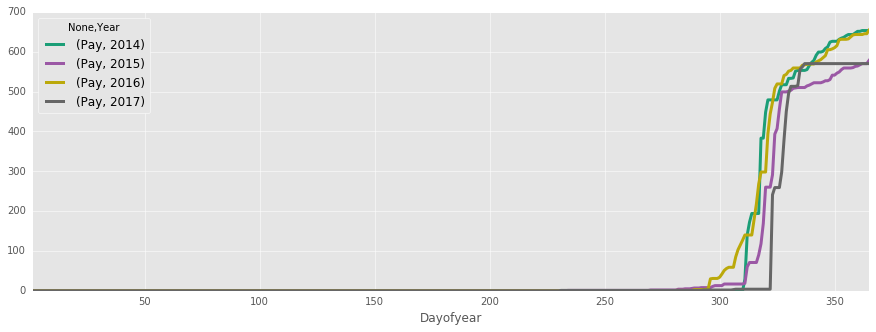

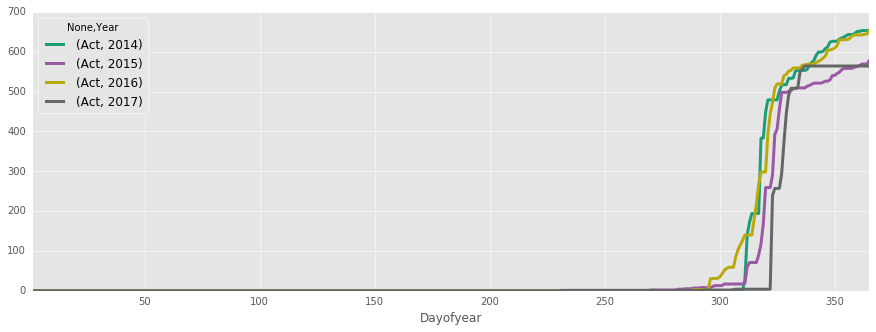

In [10]:
for stage in ['Inq', 'Sub', 'Com', 'Adm', 'Dep', 'Pre', 'Pay', 'Act']:
    stageData = df[['Year', 'Dayofyear', stage]]
    pivot = stageData.pivot_table(index='Dayofyear', columns='Year').fillna(0)
    cumulative = pivot.cumsum()
    #matplotlib.style.use('ggplot')
    plt.figure()
    cumulative.plot(linewidth=3, colormap='Dark2')